### Bank Term Deposit Marketing Prediction- EDA
Predict if the client will subscribe a term deposit or not

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import dependecies 
import numpy as np
import pandas as pd
#from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA 

# Ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns 
#from pylab import plot, show
%matplotlib inline

In [2]:
# Read csv files
bank_additional_full_df=pd.read_csv('data/bank-additional/bank-additional-full.csv',sep=';')

#### Analysing Bank Additional Full file

In [3]:
# Columns information
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
# Check data shape
bank_additional_full_df.shape

(41188, 21)

In [5]:
# Check sample data 
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Describe
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Check for null values
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# Get column info
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

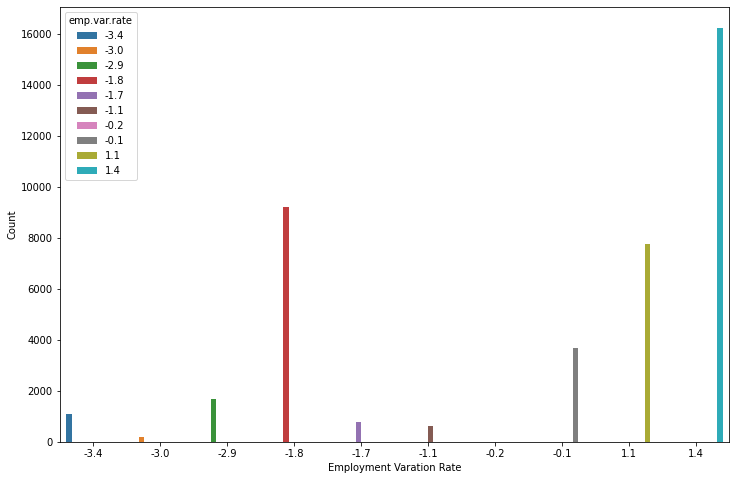

In [9]:
# Plot employment variation rate 
plt.rcParams['figure.figsize'] = (12, 8)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=bank_additional_full_df)
plt.xlabel("Employment Varation Rate")
plt.ylabel("Count")
plt.show()

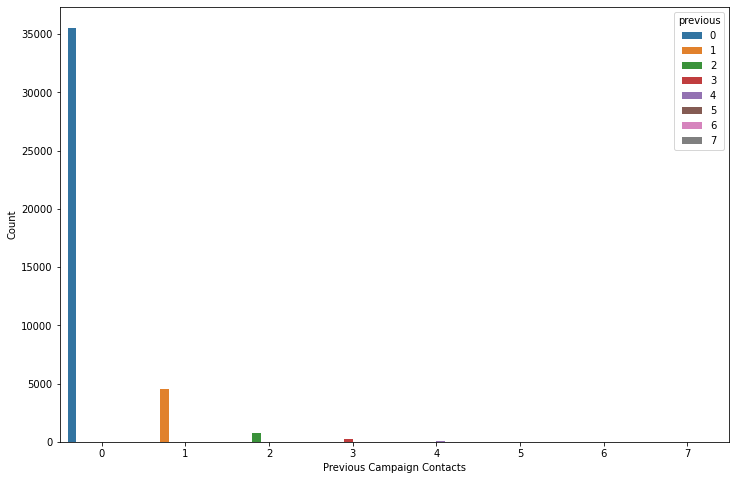

In [10]:
# Previous number of contacts made before this campaign 
plt.rcParams['figure.figsize'] = (12, 8)
sns.countplot(x='previous',hue='previous',data=bank_additional_full_df)
plt.xlabel("Previous Campaign Contacts")
plt.ylabel("Count")
plt.show()

Check if dependent variable data is unbalanced data

In [11]:
# Get count of y to understand if its unbalanced data-set
bank_additional_full_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

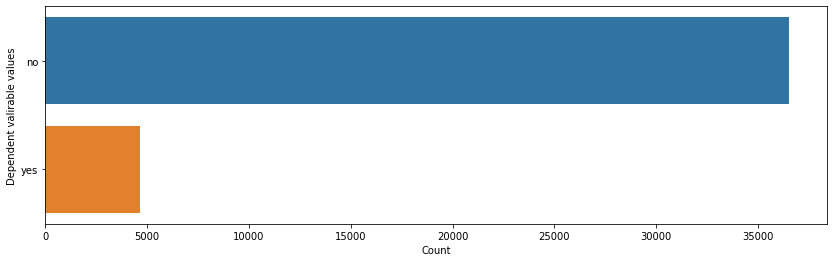

In [12]:
# Plot user device use
import seaborn as sns
f, axes = plt.subplots(figsize=(14,4))
ax = sns.countplot(y=bank_additional_full_df['y'])
plt.xlabel("Count")
plt.ylabel("Dependent valirable values")
plt.show()

#### Feature correlation heatmap
- A great way to gain a high level view of relationships amongst the features.

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

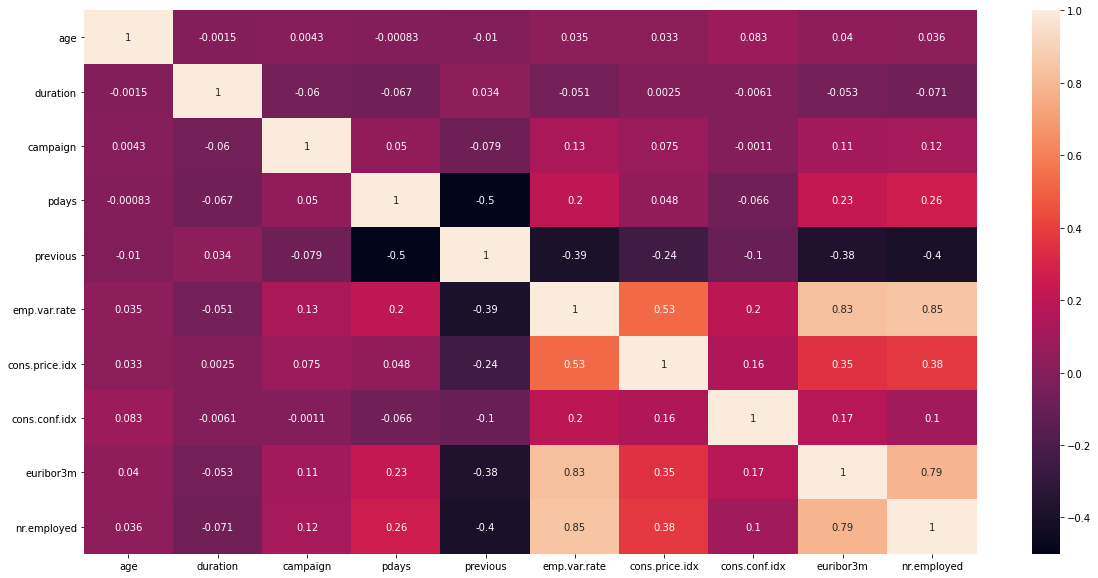

In [13]:
# Chart heatmap to see highly corrlated feature

#Get Correlation between different variables
corr = bank_additional_full_df.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
bank_additional_full_df.columns

#### Let's handle categorial features

In [14]:
# Convert 'yes' and 'no' to numbers
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_additional_full_df['y']=bank_additional_full_df['y'].map(lambda x: y_n_lookup[x])

In [15]:
# Job feature - change to employed or non-employed
bank_additional_full_df['job'] = bank_additional_full_df['job'].apply(lambda x: 0 if x=='unemployed' else 1)

In [16]:
# Check value count for marital status
bank_additional_full_df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [17]:
# Check value count for default
bank_additional_full_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
# Check value count for housing status
bank_additional_full_df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [19]:
# Check value count for loan status
bank_additional_full_df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
# Check value count for contact types
bank_additional_full_df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [21]:
# Check value count for poutcome status
bank_additional_full_df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [22]:
# Use find replace to rank education data
education_nums = {"education": {"university.degree": 7, "professional.course": 6, "high.school": 5, 
                                "basic.9y": 4, "basic.6y": 3, "basic.4y": 2, "unknown":1,"illiterate":0 }}
bank_additional_full_df = bank_additional_full_df.replace(education_nums)
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,married,2,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,married,5,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,married,5,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,married,3,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,married,5,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [23]:
# Get dummy columns with "marital", "default","housing","loan","contact","poutcome" 
bank_additional_full_df = pd.get_dummies(bank_additional_full_df, 
                          columns=["marital", "default","housing","loan","contact","poutcome"], 
                          prefix=["marital", "default","housing","loan","contact","poutcome"])

In [24]:
# Check value count for month status
bank_additional_full_df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [25]:
# Check value count for day_of_week status
bank_additional_full_df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [26]:
# Get dummy variables for month
month_df = pd.get_dummies(bank_additional_full_df.month, drop_first=True)

In [27]:
# Get dummy variables for days of week
day_of_week_df = pd.get_dummies(bank_additional_full_df.day_of_week, drop_first=True)

In [28]:
# Concat month and days of week columns
bank_additional_full_df = pd.concat([bank_additional_full_df,month_df,day_of_week_df],axis=1)

In [29]:
# Drop month and days of week columns
bank_additional_full_df = bank_additional_full_df.drop(['month','day_of_week'] , axis='columns')

In [30]:
# Check df columns
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  int64  
 2   education             41188 non-null  int64  
 3   duration              41188 non-null  int64  
 4   campaign              41188 non-null  int64  
 5   pdays                 41188 non-null  int64  
 6   previous              41188 non-null  int64  
 7   emp.var.rate          41188 non-null  float64
 8   cons.price.idx        41188 non-null  float64
 9   cons.conf.idx         41188 non-null  float64
 10  euribor3m             41188 non-null  float64
 11  nr.employed           41188 non-null  float64
 12  y                     41188 non-null  int64  
 13  marital_divorced      41188 non-null  uint8  
 14  marital_married       41188 non-null  uint8  
 15  marital_single     

In [31]:
# Get sample data
bank_additional_full_df.head()

,age,job,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,jun,mar,may,nov,oct,sep,mon,thu,tue,wed
0,56,1,2,261,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
1,57,1,5,149,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
2,37,1,5,226,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
3,40,1,3,151,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
4,56,1,5,307,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0


#### Handle imbalanced data

* Imbalanced datasets are a special case for classification problem where the class distribution is not uniform among the classes. 
* Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class. Let's use check various techniques to select data for Modelling.
    - a. Random Undersampling and Oversampling
    - b. Undersampling using Tomek Links
    - c. Oversampling using SMOTE

In [32]:
#!pip install imblearn

##### 1. Random Undersampling and Oversampling
- A widely adopted and perhaps the most straightforward method for dealing with highly imbalanced datasets is called resampling. 
- It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

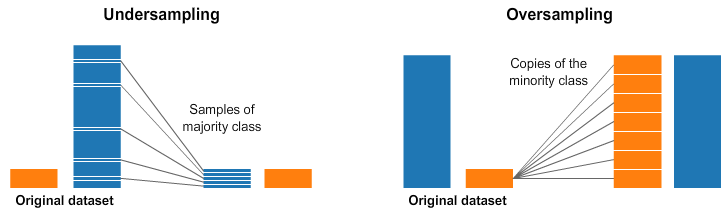

#### 1. Random oversampling and undersampling

In [33]:
# Get the actual data count for taget variable
num_0 = len(bank_additional_full_df[bank_additional_full_df['y']==0])
num_1 = len(bank_additional_full_df[bank_additional_full_df['y']==1])

# Actual data size
print("Original data size of each class of target variable: ", num_0,num_1)

# Lets use undersample - means reduce data count from the majority class
undersampled_data = pd.concat([ bank_additional_full_df[bank_additional_full_df['y']==0].sample(num_1), 
                               bank_additional_full_df[bank_additional_full_df['y']==1] ])
# Random undersample
print("Size of random undersample data size is: ", len(undersampled_data))

# Random oversample
oversampled_data = pd.concat([ bank_additional_full_df[bank_additional_full_df['y']==0], 
                              bank_additional_full_df[bank_additional_full_df['y']==1].sample(num_0, replace=True) ])

print("Size of random oversample data size is: ",len(oversampled_data))

Original data size of each class of target variable:  36548 4640
Size of random undersample data size is:  9280
Size of random oversample data size is:  73096


#### Undersampling and Oversampling using imbalanced-learn
 
imbalanced-learn(imblearn) is a Python Package to tackle the curse of imbalanced datasets. It provides a variety of methods to undersample and oversample.

a. Undersampling using Tomek Links: 
   - One of such methods it provides is called Tomek Links. Tomek links are pairs of examples of opposite classes in close vicinity.
   - In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier.
   
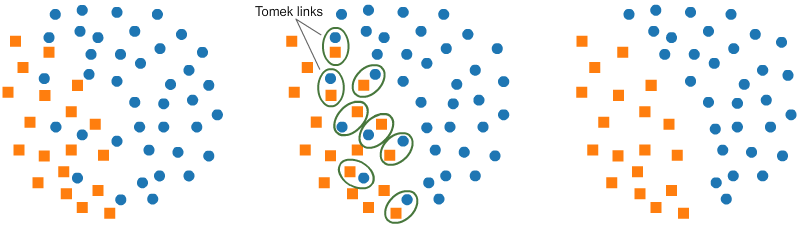

In [34]:
# Undersampling techique
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from collections import Counter

In [35]:
# Separating the independent variables from dependent variables
X = bank_additional_full_df.drop(['y'], axis='columns')
y = bank_additional_full_df['y']

In [36]:
# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [37]:
# Create TomekLinks Object
undersample = TomekLinks()

# Summarize class distribution
print("Before undersampling: ", Counter(y_train))

# Transform the dataset
X_train_TomekLinks, y_train_TomekLinks = undersample.fit_resample(X,y)

# Summarize class distribution
print("After undersampling: ", Counter(y_train_TomekLinks))

Before undersampling:  Counter({0: 25532, 1: 3299})
After undersampling:  Counter({0: 35310, 1: 4640})


b. Undersampling techique using imbalanced-learn

In [38]:
# Import library
from imblearn.over_sampling import SMOTE

In [39]:
# Summarize class distribution
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({0: 25532, 1: 3299})


In [40]:
# Create oversampling SMOTE object
SMOTE = SMOTE()

In [41]:
# Fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [42]:
# Summarize class distribution
print("After oversampling: ", Counter(y_train_SMOTE))

After oversampling:  Counter({1: 25532, 0: 25532})


### Feature selection

- The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

#### Filter methods
- Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

- Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

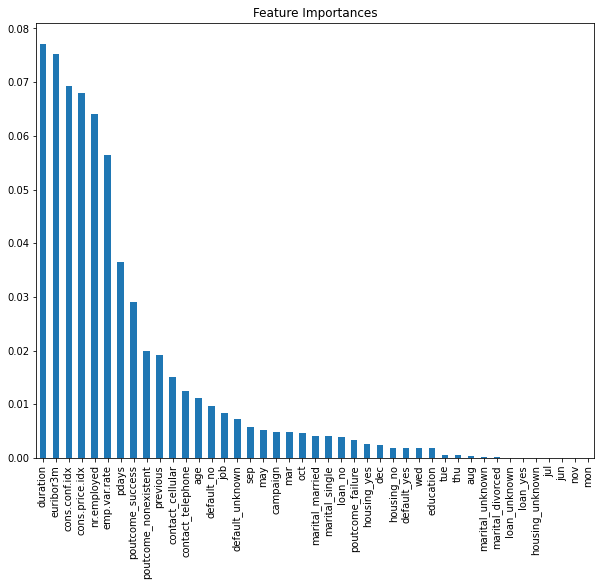

In [43]:
from sklearn.feature_selection import mutual_info_classif

# Plot size
plt.figure(figsize=(10,8))

# Lets get feature importance
importances = mutual_info_classif(X,y)
feature_importance = pd.Series(importances,bank_additional_full_df.drop(['y'], axis='columns').columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances')
plt.show()

In [44]:
# Remove features with Score < 0.01
feature_importance[feature_importance>0.01]

duration                0.077133
euribor3m               0.075265
cons.conf.idx           0.069220
cons.price.idx          0.067961
nr.employed             0.064112
emp.var.rate            0.056473
pdays                   0.036456
poutcome_success        0.029141
poutcome_nonexistent    0.020021
previous                0.019196
contact_cellular        0.015052
contact_telephone       0.012504
age                     0.011274
dtype: float64

#### Use XGBoost Feature importance

In [45]:
# XGBoost Modelling 
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [46]:
# Fit model to training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

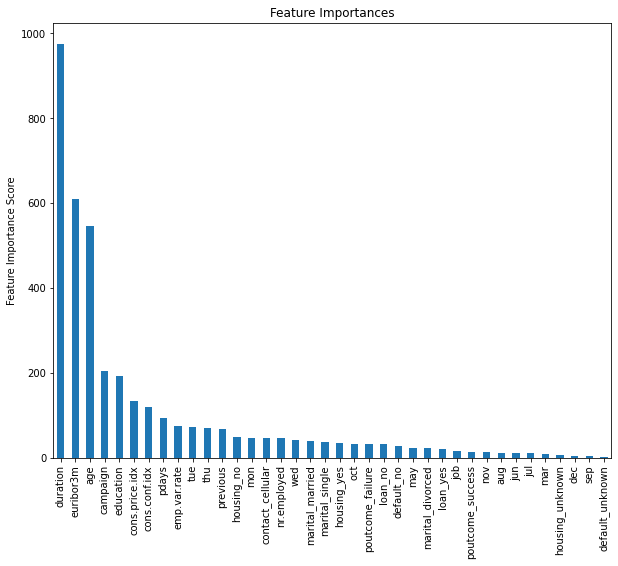

In [47]:
# Plot size
plt.figure(figsize=(10,8))

# Feature Importance
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [48]:
# Get top 10 features
feat_imp.head(10)

duration          976
euribor3m         610
age               546
campaign          204
education         192
cons.price.idx    135
cons.conf.idx     120
pdays              94
emp.var.rate       75
tue                72
dtype: int64

#### Use RandomForest Feature importance

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier(n_estimators=340)

# Fit model
model.fit(X,y)

# Get feature importances
importances = model.feature_importances_

In [50]:
# Create df for plotting
feature_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
  
# Set index
feature_df.set_index("Features", inplace=True)

# Sort in ascending order to better visualization
feature_df = feature_df.sort_values("Importances",ascending=False)

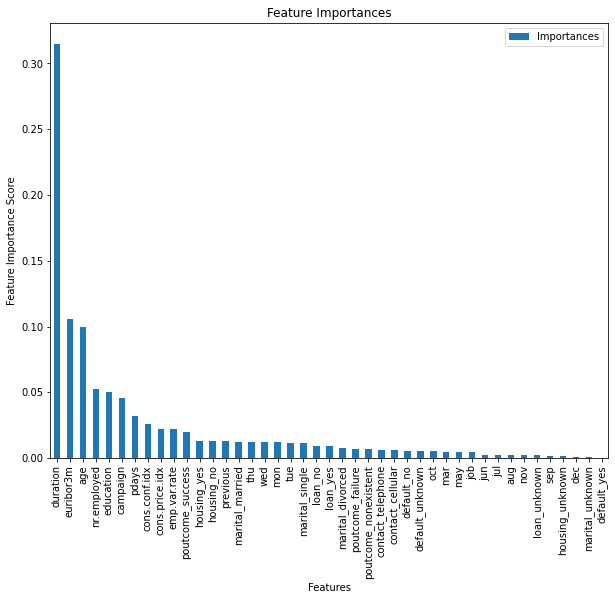

In [51]:
# Plot 
feature_df.plot(kind="bar",title='Feature Importances', figsize=(10,8))
plt.ylabel('Feature Importance Score')

# Show plot
plt.show()

In [52]:
# Get top 10 features
feature_df.head(10)

,Importances
Features,
duration,0.314906
euribor3m,0.105518
age,0.099362
nr.employed,0.052594
education,0.050461
campaign,0.046028
pdays,0.031733
cons.conf.idx,0.025770
cons.price.idx,0.022337


####  PCA for feature selection

In [53]:
# Get feature info and chart a graph to understand component impact on variance
def getFetureInfo(X):
    
    # Create a StandardScaler object
    sc = StandardScaler()

    # Standardize the data
    X_std = sc.fit_transform(X) 

    # Create PCA object and fit scaled data
    pca = PCA()
    X_pca = pca.fit(X_std)

    # Plot the chart to understand component impact on variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    # Label axis
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    
    # return scaled data
    return X_std

In [54]:
# Let's get important feature count - which features are contributing most to the components
def getPCACount(X_std):
    # Other way to find out component count is to use n_componenet value as 0.99
    pca = PCA(n_components = 0.99)

    # Fit and reduce dimensions
    X_pca = pca.fit_transform(X_std) 

    # Print # of components
    print("Number of PCA Componenets suggested: " , pca.n_components_)
    
    # return pca 
    return pca

In [55]:
# Let's get important features info - which features are contributing most to the components
def getPCAFeatures(pca):
    # Number of component
    n_pcs= pca.n_components_ 

    # Get the index of the most important feature on each component
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    #  Get the column names
    initial_feature_names = X.columns

    # Get the most important feature names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # Import features
    print("Important features: " , most_important_names)

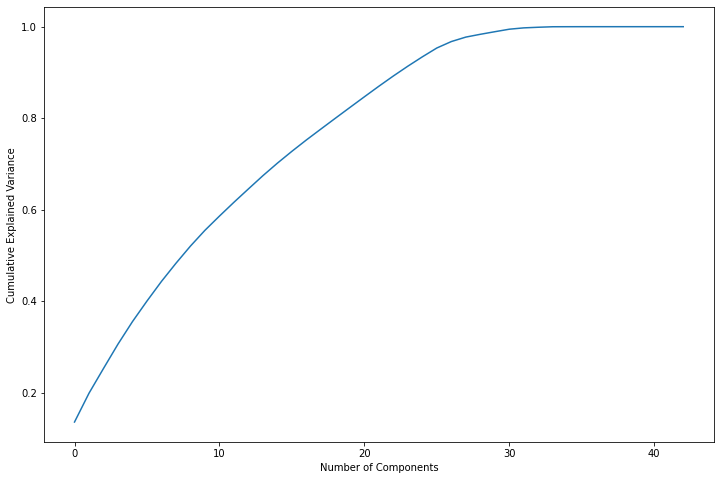

Number of PCA Componenets suggested:  31
Important features:  ['euribor3m', 'contact_telephone', 'loan_unknown', 'marital_single', 'pdays', 'housing_yes', 'cons.conf.idx', 'loan_yes', 'default_unknown', 'poutcome_failure', 'marital_divorced', 'mon', 'thu', 'tue', 'jun', 'nov', 'duration', 'job', 'marital_unknown', 'dec', 'marital_unknown', 'default_yes', 'job', 'mar', 'campaign', 'education', 'age', 'jul', 'cons.conf.idx', 'cons.price.idx', 'thu']


In [56]:
# Get feature importance
X_std = getFetureInfo(X)
pca = getPCACount(X_std)
getPCAFeatures(pca)

In [57]:
len(bank_additional_full_df.columns)

44

#### Removing features with low variance

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [59]:
# Get scaler reference
scaler = MinMaxScaler()

In [60]:
# Fit independent variablea or features
scaler.fit(X_train)

MinMaxScaler()

In [61]:
# Transfor features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Build Model
base_model = DecisionTreeClassifier(criterion='gini')

In [63]:
# Train model
base_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# VarianceThreshold is a simple baseline approach to feature selection. 
from sklearn.feature_selection import VarianceThreshold,SelectFromModel

# It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features.
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)

print(X_train_remove_variance.shape)

(28831, 43)


In [65]:
# Determine which features ought to be kept
preSelected_features = sorted(zip(base_model.feature_importances_, X.columns.tolist()), reverse=True)
ranked_features = pd.DataFrame(preSelected_features, columns=['Score', 'Feature'])
ranked_features = ranked_features.set_index('Feature')
ranked_features.head(10)

,Score
Feature,
duration,0.356550
nr.employed,0.152900
age,0.098908
euribor3m,0.081307
education,0.039467
campaign,0.038740
cons.conf.idx,0.024083
pdays,0.019991
wed,0.011877
